Sun-Earth System
============================

**NOTE: planets are currently under testing and not yet supported**

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.1 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.1,<2.2"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
from phoebe import c # constants
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(starA='sun', starB='earth', orbit='earthorbit')

Setting Parameters
---------------------------

In [3]:
b.set_value('teff@sun', 1.0*u.solTeff)
b.set_value('requiv@sun', 1.0*u.solRad)

b.flip_constraint('period@sun', solve_for='syncpar')
b.set_value('period@sun', 24.47*u.d)
#b.set_value('incl', 23.5*u.deg)

In [4]:
b.set_value('teff@earth', 252*u.K)
b.set_value('requiv@earth', 1.0*c.R_earth)

b.flip_constraint('period@earth', solve_for='syncpar')
b.set_value('period@earth', 1*u.d)

In [5]:
b.set_value('sma@earthorbit', 1*u.AU)
b.set_value('period@earthorbit', 1*u.yr)
b.set_value('q@earthorbit', c.M_earth/c.M_sun)

#b.set_value('ecc@earthorbit')

In [6]:
print("Msun: {}".format(b.get_quantity('mass@sun@component', unit=u.solMass)))
print("Mearth: {}".format(b.get_quantity('mass@earth@component', unit=u.solMass)))

Msun: 1.00003477935 solMass
Mearth: 3.00451679349e-06 solMass


Running Compute
--------------------

In [7]:
b.add_dataset('mesh', times=[0.5], dataset='mesh01')

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [8]:
b.add_dataset('lc', times=np.linspace(-0.5,0.5,51), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

In [9]:
b.set_value('ld_func@earth', 'logarithmic')
b.set_value('ld_coeffs@earth', [0.0, 0.0])

We'll have the sun follow a roche potential and the earth follow a rotating sphere (rotstar).

**NOTE**: this doesn't work yet because the rpole<->potential is still being defined by roche, giving the earth a polar radius way too small.

In [10]:
b['distortion_method@earth'] = 'rotstar'

The temperatures of earth will fall far out of bounds for any atmosphere model, so let's set the earth to be a blackbody and use a supported limb-darkening model (the default 'interp' is not valid for blackbody atmospheres).

In [11]:
b['atm@earth'] = 'blackbody'
b.set_value_all('ld_func@earth', 'logarithmic')
b.set_value_all('ld_coeffs@earth', [0, 0])

In [12]:
b.run_compute()

<ParameterSet: 8 parameters | kinds: mesh, lc>

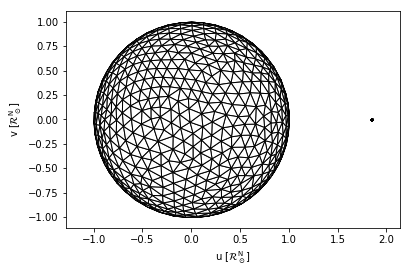

In [13]:
axs, artists = b.plot(dataset='mesh01', show=True)

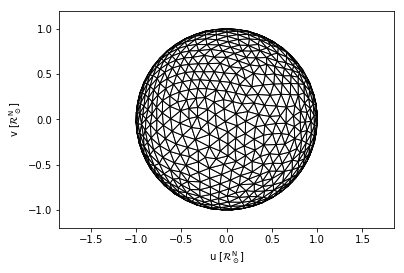

In [14]:
axs, artists = b.plot(dataset='mesh01', component='sun', show=True)

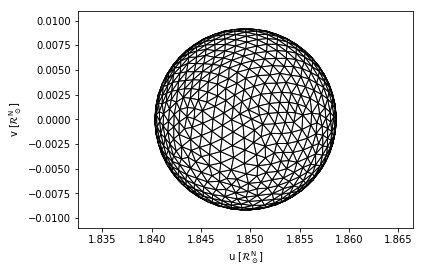

In [15]:
axs, artists = b.plot(dataset='mesh01', component='earth', show=True)

In [16]:
b['requiv@earth@component']

<Parameter: requiv=0.00916794020411 solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

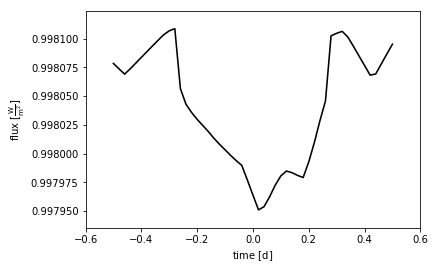

In [17]:
axs, artists = b.plot(dataset='lc01', show=True)